In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import linregress

In [2]:
fires_csv = pd.read_csv("../project_1_resources/Fires.csv", lineterminator='\n', low_memory=False)
fires_csv.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,63.0,Plumas,NaN
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,61.0,Placer,NaN
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,17.0,El Dorado,NaN
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,3.0,Alpine,NaN
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,3.0,Alpine,NaN


In [3]:
reduced_fires = fires_csv.loc[:, ['SOURCE_REPORTING_UNIT_NAME', 'FIRE_YEAR',
                                   'DISCOVERY_DATE', 'STAT_CAUSE_DESCR', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
                                   'LATITUDE', 'LONGITUDE', 'STATE']]
reduced_fires.head()

,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,Plumas National Forest,2005,2453403.5,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,Eldorado National Forest,2004,2453137.5,Lightning,0.25,A,38.933056,-120.404444,CA
2,Eldorado National Forest,2004,2453156.5,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,Eldorado National Forest,2004,2453184.5,Lightning,0.10,A,38.559167,-119.913333,CA
4,Eldorado National Forest,2004,2453184.5,Lightning,0.10,A,38.559167,-119.933056,CA


In [4]:
fires_clean = reduced_fires.dropna(how='any')
fires_clean.head()

,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,DISCOVERY_DATE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,Plumas National Forest,2005,2453403.5,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,Eldorado National Forest,2004,2453137.5,Lightning,0.25,A,38.933056,-120.404444,CA
2,Eldorado National Forest,2004,2453156.5,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,Eldorado National Forest,2004,2453184.5,Lightning,0.10,A,38.559167,-119.913333,CA
4,Eldorado National Forest,2004,2453184.5,Lightning,0.10,A,38.559167,-119.933056,CA


In [5]:
fires_clean.count()

SOURCE_REPORTING_UNIT_NAME    1880465
FIRE_YEAR                     1880465
DISCOVERY_DATE                1880465
STAT_CAUSE_DESCR              1880465
FIRE_SIZE                     1880465
FIRE_SIZE_CLASS               1880465
LATITUDE                      1880465
LONGITUDE                     1880465
STATE                         1880465
dtype: int64

In [6]:
fires_clean["FIRE_YEAR"].value_counts()

2006    114004
2000     96416
2007     95573
2011     90552
1999     89363
2005     88604
2001     86587
2008     85378
2010     79889
2009     78325
1994     75955
2002     75656
1996     75574
2015     74491
2012     72769
1995     71472
2004     69279
1998     68370
2003     68261
1992     67975
2014     67753
2013     64780
1993     61989
1997     61450
Name: FIRE_YEAR, dtype: int64

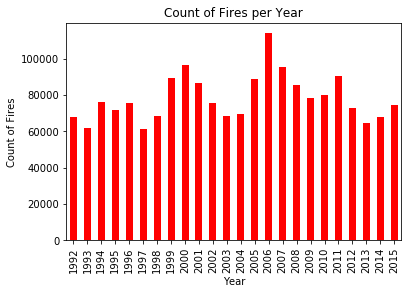

In [7]:
year_data = fires_clean["FIRE_YEAR"].value_counts(sort=False)
year_data.plot(kind="bar", facecolor="red")
plt.title("Count of Fires per Year")
plt.xlabel("Year")
plt.ylabel("Count of Fires")
plt.savefig("../bargraphyoy.png")
plt.show()

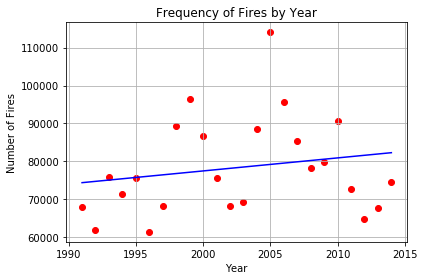

In [8]:
x_values = np.arange(1991,2015,1)
y_values = year_data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, marker="o", color="red")
plt.plot(x_values,regress_values,"b")
plt.title("Frequency of Fires by Year")
plt.xlabel("Year")
plt.ylabel("Number of Fires")
plt.grid()
plt.tight_layout()
plt.savefig("../scatterplotyoy.png")
plt.show()